# A&E testing 1

This script is for some initial testing of the previous A&E data:
<ul>
<li>quick regression analysis</li>
<li>plotting of variables previously made over time</li>
</ul>



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

### vars for test_regressions function
import statsmodels.formula.api as smf
import patsy

In [2]:
dta = pd.read_csv('../3_Data/master_acute.csv')

In [3]:
dta.head(1)

,year,quarter,org_code,areateam,areateam_code,org,sha_code,v_4hr_targ,v_canc_elec,v_3,v_5,v_4,v_6
0,2016,4,RF4,London Commissioning Region,NaN,"Barking, Havering And Redbridge University Hos...",Y56,0.129234,2.797023,842.820739,0.122619,0.079995,0.266936


In [4]:
dta.columns

Index(['year', 'quarter', 'org_code', 'areateam', 'areateam_code', 'org',
       'sha_code', 'v_4hr_targ', 'v_canc_elec', 'v_3', 'v_5', 'v_4', 'v_6'],
      dtype='object')

# Define outliers function

In [19]:
def outlier_removal(df,year,quarter,x_var,outlier_plot=False):
    """
    filter outliers and remove them, optional plotting to view the changes to distributions
    """
    y_var1 = 'v_4hr_targ'
    y_var2 = 'v_canc_elec'
    
    dff = df[(df['year'] == year) & (df['quarter'] == quarter)].copy()
    
    #### Remove rows containing nan in x_var column (otherwise error with ln calcs)
    dff.replace([np.inf, -np.inf], np.nan, inplace=True)
    dff = dff[dff[x_var].notnull()]
    
    if outlier_plot == True:
        fig2 = plt.figure(figsize=(15,15))
        #### Scatters of original data
        ## scatter and regression line for x_var
        ax1 = plt.subplot(337)
        ax1 = sns.boxplot(dff[x_var], vert=True)
        ax2 = plt.subplot(338)
        ax2 = dff[x_var].plot(kind='hist',bins=50)
        ax2.axvline(dff[x_var].median(),color= 'r',label='median')
        ax2.set_xlabel(x_var)
        ax2 = dff[x_var].plot(kind='kde', grid=False,label='KDE')
        
        ## y_var1
        ax4 = plt.subplot(331)
        ax4 = sns.boxplot(dff[y_var1], vert=True)
        ax5 = plt.subplot(332)
        ax5 = dff[y_var1].plot(kind='hist',bins=50)
        ax5.axvline(dff[y_var1].median(),color= 'r',label='median')
        ax5.set_xlabel(y_var1)
        ax5 = dff[y_var1].plot(kind='kde', grid=False,label='KDE')
        
        ## y_var2
        ax7 = plt.subplot(334)
        ax7 = sns.boxplot(dff[y_var2], vert=True)
        ax8 = plt.subplot(335)
        ax8 = dff[y_var2].plot(kind='hist',bins=50)
        ax8.axvline(dff[y_var2].median(),color= 'r',label='median')
        ax8.set_xlabel(y_var2)
        ax8 = dff[y_var2].plot(kind='kde', grid=False,label='KDE')
    
    
    #### filter out outliers
    low = 0.01 # define limts
    high = 0.99
    quant_df = dff.quantile([low, high])
    
    #dff.sort(columns=['size'])[1:-1]
    
    
    ## make mask for all 3vars
    quant_mask = ( (dff[x_var] > quant_df[x_var].values.min()) & (dff[x_var] < quant_df[x_var].values.max()) &
                  (dff[y_var1] > quant_df[y_var1].values.min()) & (dff[y_var1] < quant_df[y_var1].values.max()) &
                  (dff[y_var2] > quant_df[y_var2].values.min()) & (dff[y_var2] < quant_df[y_var2].values.max())
                 )
    
    
    
    #((df.regiment != 'Nighthawks') & (df['size'] > 986) )
    size_1 = dff.shape[0]
    dff = dff.loc[dff[quant_mask].index]
    size_2 = dff.shape[0]
    
    print('Automatic filtering applied')
    print('Trusts before: ', size_1)
    print('Trusts after: ', size_2)
    print('Perc removed: ', "%.1f" % (100*(size_1 - size_2)/size_1))
    
    #print(quant_df)
    #print(dff[x_var].shape)
    #print(quant_df.min())
    #dff = dff[x_var] > 
    #dff[x_var].map(lambda x: x[(x>quant_df.min()) & (x < quant_df.max())])
    
    if outlier_plot == True:
        #### plot new datasets
        ax3 = plt.subplot(339)
        dff[x_var].plot(kind='hist',bins=50)
        ax3.axvline(dff[x_var].median(),color= 'r',label='median')
        ax3.set_xlabel(x_var)
        ax3 = dff[x_var].plot(kind='kde', grid=False,label='KDE')
        ax3.set_ylim(ax2.get_ylim()) # set axis to be same as before for comparison
        ax3.set_xlim(ax2.get_xlim())
        
        ax6 = plt.subplot(333)
        dff[y_var1].plot(kind='hist',bins=50)
        ax6.axvline(dff[y_var1].median(),color= 'r',label='median')
        ax6.set_xlabel(y_var1)
        ax6 = dff[y_var1].plot(kind='kde', grid=False,label='KDE')
        ax6.set_ylim(ax5.get_ylim()) # set axis to be same as before for comparison
        ax6.set_xlim(ax5.get_xlim())
        
        ax9 = plt.subplot(336)
        dff[y_var2].plot(kind='hist',bins=50)
        ax9.axvline(dff[y_var2].median(),color= 'r',label='median')
        ax9.set_xlabel(y_var2)
        ax9 = dff[y_var2].plot(kind='kde', grid=False,label='KDE')
        ax9.set_ylim(ax8.get_ylim()) # set axis to be same as before for comparison
        ax9.set_xlim(ax8.get_xlim())
    
    
    
    return(dff)

# Regression tool function

C:\Anaconda3\envs\stable2\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: divide by zero encountered in log


Automatic filtering applied
Trusts before:  61
Trusts after:  55
Perc removed:  9.8


C:\Anaconda3\envs\stable2\lib\site-packages\matplotlib\text.py:2138: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


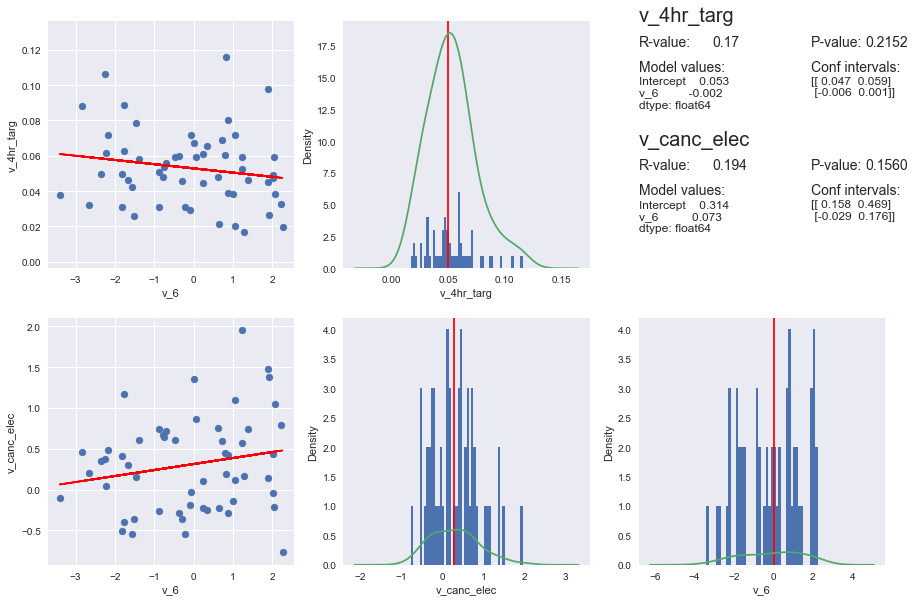

In [168]:
def test_regressions_quarter(df,year,quarter,x_var,xlog=False,y1log=False,y2log=False,
                     ols_output=False,rm_outlier=False,outlier_plot=False):
    """
    Function to calculate and show OLS results
    """
    #### define the dependent variables
    y_var1 = 'v_4hr_targ'
    y_var2 = 'v_canc_elec'
    
    #### filter for quarter and year
    dff = df[(df['year'] == year) & (df['quarter'] == quarter)].copy()
       
    #### optionality for taking ln of variables
    if xlog == True:
        dff[x_var] = np.log(dff[x_var])
    
    if y1log == True:
        dff[y_var1] = np.log(dff[y_var1])
    
    if y2log == True:
        dff[y_var2] = np.log(dff[y_var2])
    
    #### Remove rows containing nan in x_var column (otherwise error with ln calcs)
    dff.replace([np.inf, -np.inf], np.nan, inplace=True)
    dff = dff[dff[x_var].notnull()]
    
    if rm_outlier == True:
        dff = outlier_removal(dff,year,quarter,x_var,outlier_plot) ### set option true for siltering plots
    
    #### conduct regression
    ## y_var1
    lm1 = []
    lm1 = smf.ols(formula= y_var1 +' ~ ' + x_var, data=dff).fit()
    #dff.sort_values(x_var,inplace=True)
    x1=[]
    x1 = patsy.dmatrix(x_var, data=dff)
    preds1 = []
    preds1 = lm1.predict(x1, transform=False)
    
    ## y_var2
    lm2 = []
    #lm2 = smf.ols(formula= y_var2 +' ~ ' , data=dff).fit() # how test for null model?
    lm2 = smf.ols(formula= y_var2 +' ~ ' + x_var, data=dff).fit()
    #dff.sort_values(x_var,inplace=True)
    x2 = []
    x2 = patsy.dmatrix(x_var, data=dff)
    preds2 = []
    preds2 = lm2.predict(x2, transform=False)
    
    
    
    #### Make plots
    fig1 = plt.figure(figsize=(15,10))
    
    #### y_var1
    ## scatter and regression line for y_var1
    ax1 = plt.subplot(231)
    ax1.scatter(x=dff[x_var], y = dff[y_var1])
    ax1.plot(x1[:,1],preds1,c='red') #### [:,1] removes the constant line at x = 1.0
    ax1.set_xlabel(x_var)
    ax1.set_ylabel(y_var1)

    ## histogram for y_var1
    ax2 = plt.subplot(232)
    ax2 = dff[y_var1].plot(kind = 'hist', bins = 50)
    ax2.axvline(dff[y_var1].median(),color= 'r',label='median')
    ax2.set_xlabel(y_var1)
    ax2 = dff[y_var1].plot(kind='kde', grid=False,label='KDE')
    #ax2.legend(loc='upper left',frameon= True)
    #ax2.set_title('distribution of: %s' % (dv1_n))
    
    #### y_var2
    ## scatter and regression line for y_var2
    ax5 = plt.subplot(234)
    ax5.scatter(x=dff[x_var], y = dff[y_var2])
    ax5.plot(x2[:,1],preds2,c='red') #### [:,1] removes the constant line at x = 1.0
    ax5.set_xlabel(x_var)
    ax5.set_ylabel(y_var2)

    ## histogram for y_var1
    ax6 = plt.subplot(235)
    ax6 = dff[y_var2].plot(kind = 'hist', bins = 50)
    ax6.axvline(dff[y_var2].median(),color= 'r',label='median')
    ax6.set_xlabel(y_var2)
    ax6 = dff[y_var2].plot(kind='kde', grid=False,label='KDE')
    #ax2.legend(loc='upper left',frameon= True)
    #ax2.set_title('distribution of: %s' % (dv1_n))
    
    #### x_var
    ## histogram for x_var
    ax3 = plt.subplot(236)
    ax3 = dff[x_var].plot(kind = 'hist', bins = 45)
    ax3.axvline(dff[x_var].median(),color= 'r',label='median')
    ax3.set_xlabel(x_var)
    ax3 = dff[x_var].plot(kind='kde', grid=False,label='KDE')
    #ax2.legend(loc='upper left',frameon= True)
    #ax2.set_title('distribution of: %s' % (dv1_n))
    
    
    #### OLS output
    ## set up axes and then clear it all
    ax4 = plt.subplot(233)
    ax4.clear()
    ax4.set_xticklabels([])
    ax4.set_yticklabels([])
    ax4.grid()
    ax4.set_facecolor((1, 1, 1))
    
    #### add details of regression to plot
    ## y_var1 details
    ax4.annotate(y_var1,xy = (0,1),textcoords='axes fraction',fontsize=20)
    
    ax4.annotate('R-value:',xy=(0,0.9),fontsize=14)
    ax4.annotate(np.sqrt(lm1.rsquared).round(3) ,xy=(0.3,0.9),fontsize=14 )
    ax4.annotate('P-value:',xy=(0.7,0.9),fontsize=14)
    ax4.annotate("{:.4f}".format(lm1.pvalues.ix[x_var]) ,xy=(0.92,0.9),fontsize=14 )
    
    ax4.annotate('Model values:', xy=(0,0.8),fontsize=14)
    ax4.annotate(lm1.params.round(3),xy = (0,0.65),textcoords='axes fraction')
    ax4.annotate('Conf intervals:',xy=(0.7,0.8),fontsize=14)
    ax4.annotate(lm1.conf_int().values.round(3),xy = (0.7,0.7),textcoords='axes fraction')
    
    ## y_var2 details
    ax4.annotate(y_var2,xy = (0,0.5),textcoords='axes fraction',fontsize=20)
    
    ax4.annotate('R-value:',xy=(0,0.4),fontsize=14)
    ax4.annotate(np.sqrt(lm2.rsquared).round(3) ,xy=(0.3,0.4),fontsize=14 )
    ax4.annotate('P-value:',xy=(0.7,0.4),fontsize=14)
    ax4.annotate("{:.4f}".format(lm2.pvalues.ix[x_var]) ,xy=(0.92,0.4),fontsize=14 )
    
    ax4.annotate('Model values:', xy=(0,0.3),fontsize=14)
    ax4.annotate(lm2.params.round(3),xy = (0,0.15),textcoords='axes fraction')
    ax4.annotate('Conf intervals:',xy=(0.7,0.3),fontsize=14)
    ax4.annotate(lm2.conf_int().values.round(3),xy = (0.7,0.2),textcoords='axes fraction')
    
    #### print regression details
    if ols_output == True:
        print(lm1.summary2())
        print(lm2.summary2())
    
    return(lm1,lm2)

lm1,lm2 = test_regressions_quarter(dta,2013,4,'v_6',xlog=True,y1log=False,y2log=True,
                           ols_output=False,rm_outlier=True,outlier_plot=False)

In [21]:
np.sqrt(0.231)

0.48062459362791665

In [40]:
np.sqrt(lm2.rsquared)

0.42502804461476751

In [47]:
float(lm2.pvalues.ix['v_3'])

1.2160389408341794e-07

In [59]:
lm2.params

Intercept   -2.804999
v_3          0.491816
dtype: float64

In [109]:
"{:.4f}".format(lm1.pvalues.ix['v_3'])

'0.6841'

In [ ]:
break

#### edit notebook settings for inf scrolling of output 

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 999;

In [ ]:
plot_outliers(dta,2011,3,'v_5',outlier_plot=True)

In [ ]:
sm.stats.anova_lm(lm1,typ=3)

In [ ]:
0.044-0.0629*0.16

In [ ]:
np.exp(-4.055)-0.274*0.16

In [ ]:
np.exp(-4.055)

In [ ]:
0.022-0.006*np.log(0.16)

# Meta-analyses

## All variables

In [ ]:
def meta_comparison_vars(df,year,quarter,y_var,xlog=False,y1log=False,y2log=False):
    """function to call a scatter plot, comparing all variables in a given time period
    
    """
    ####
    #### define the dependent variables
    y_var1 = 'v_4hr_targ'
    
    #### filter for quarter and year
    dff = df[(df['year'] == year) & (df['quarter'] == quarter)].copy()
       
    #### optionality for taking ln of variables
    if xlog == True:
        dff[x_var] = np.log(dff[x_var])
    
    if y1log == True:
        dff[y_var1] = np.log(dff[y_var1])
    
    if y2log == True:
        dff[y_var2] = np.log(dff[y_var2])
    
    #### Remove rows containing nan in x_var column (otherwise error with ln calcs)
    dff.replace([np.inf, -np.inf], np.nan, inplace=True)
    dff = dff[dff[x_var].notnull()]
    
    return
    
meta_comparison_vars(dta,2015,1,'v_4hr_targ',xlog=True,y1log=True,y2log=True)

In [ ]:
def scatter_comparison_v2(df,year_req,quarter_req,ivar,prob_vars):
    """function to call scatter plot, comparing different variables for a specified time period
    
    inputs:
    year_req (as string)
    quarter_req (as string)
    ivar: choose indep var (e.g. v1)
    prob_vars: used to give string of var name to remove from data (as high r^2 value)
    
    _v2 normalises all variables to the MAX value of a given Time period in order for better comparison
    """
    ##### filter entire df for specified time periods
    tmp = df.query('year == '+ year_req +' and quarter == ' + quarter_req)
    
    ##### get list of variables
    vars_list = list(tmp.columns[3:].values) # get all v's (note will change if df changes shape)
    ## remove ivar from this list
    vars_list.remove(ivar)
    vars_list.remove(prob_vars)
    
    #add function here which can normalise each of the variables to the MAX of itself for comparison
    
    
    #tmp['v2'] = tmp['v2'].values/tmp['v2'].values.max()
    
    ##### initialize new df for regression calcs
    df_coef = pd.DataFrame(columns = ['var_name','cons','gradient','ci_u','ci_l','r2'])
    
    ##### loop through dvs and calc values and input into df
    i = 0
    for dvar in vars_list:
        
        # get df with only iv and dv in
        tmp2 = tmp[[ivar,dvar]]
        
        #remove nans
        tmp2 = tmp2.dropna(axis=0,how='any')
        # normalise values so that can compare on same axes sensibly!!!
        tmp2[dvar] = tmp2[dvar].values / tmp2[dvar].values.max()
        
        #calculate values of regression
        
        y = tmp2[ivar].values
        X = sm.add_constant(tmp2[dvar].values) # need to add a const value within X array apparently!!
        model = sm.OLS(y, X)
        results = model.fit()
        #print(results.summary())
        results.params
        
        #enter values into df
        df_coef.loc[i] = [dvar,
                          results.params[0],results.params[1],
                          results.conf_int()[1][1],results.conf_int()[1][0],
                          results.rsquared
                         ]
        
        # add to i (for df_coef indexing)
        i += 1
    
    ##### Create Scatter
    
    ## make groups
    ED_perf = ['v1','v2','v3','v4','v5','v6','v7','v8','v9']
    mort_ind = ['v10','v11','v12','v13','v14','v15','v16','v17','v18','v19']
    re_atten = ['v20','v21','v22','v23','v24','v25','v26','v27','v28','v29']
    bed_avail = ['v30','v31','v32','v33','v34','v35','v36','v37','v38','v39']
    del_trans = ['v40','v41','v42','v43','v44','v45','v46','v47','v48','v49']
    hosp_activ = ['v50','v51','v52','v53','v54','v55','v56','v57','v58','v59']
    
    #create axes
    fig, axs = plt.subplots(1,2,figsize=(14, 8))
    
    ## create handle for first axes
    ax = axs[0]
    
    #plot all vals
    ax.scatter(df_coef.gradient.values, df_coef.r2.values,s=50,label='others')
    #plot individual groups of vars
    ax.scatter(df_coef[df_coef['var_name'].isin(ED_perf)].gradient.values,
               df_coef[df_coef['var_name'].isin(ED_perf)].r2.values,s=50,
               color='r',label ='ED_perf')
    
    ax.scatter(df_coef[df_coef['var_name'].isin(mort_ind)].gradient.values,
               df_coef[df_coef['var_name'].isin(mort_ind)].r2.values,s=50,
               color='g',label ='mort_ind')
    
    ax.scatter(df_coef[df_coef['var_name'].isin(re_atten)].gradient.values,
               df_coef[df_coef['var_name'].isin(re_atten)].r2.values,s=50,
               color='c',label ='re_atten')
    
    ax.scatter(df_coef[df_coef['var_name'].isin(bed_avail)].gradient.values,
               df_coef[df_coef['var_name'].isin(bed_avail)].r2.values,s=50,
               color='m',label ='bed_avail')
    
    ax.scatter(df_coef[df_coef['var_name'].isin(del_trans)].gradient.values,
               df_coef[df_coef['var_name'].isin(del_trans)].r2.values,s=50,
               color='y',label ='del_trans')
    
    ax.scatter(df_coef[df_coef['var_name'].isin(hosp_activ)].gradient.values,
               df_coef[df_coef['var_name'].isin(hosp_activ)].r2.values,s=50,
               color='w',label ='hosp_activ')
    
    #create x-error var
    error_x = [(df_coef.gradient.values - df_coef.ci_u.values),(df_coef.ci_l.values - df_coef.gradient.values)]
    #plot error bars
    ax.errorbar(df_coef.gradient.values, df_coef.r2.values, xerr = error_x, yerr=None,ls='none',linewidth=1,color='k')
    ax.set_xlabel('OLS gradient')
    ax.set_ylabel('OLS R^2 value')
    ax.set_title('Reg coefs for: year ' + year_req+ ', Q' + quarter_req)
    ax.axvline(0,color= 'r',linewidth=0.5)
    plt.ylim(ymin = -0.001, ymax = (df_coef.r2.max() + 0.01) )
    
    ax.legend(loc='best',frameon= True)
    
    ## create handle for first axes
    ax = axs[1]
    
    #plot all vals
    ax.scatter(df_coef.gradient.values, df_coef.r2.values,s=50,label='others')
    #plot individual groups of vars
    ax.scatter(df_coef[df_coef['var_name'].isin(ED_perf)].gradient.values,
               df_coef[df_coef['var_name'].isin(ED_perf)].r2.values,s=50,
               color='r',label ='ED_perf')
    
    ax.scatter(df_coef[df_coef['var_name'].isin(mort_ind)].gradient.values,
               df_coef[df_coef['var_name'].isin(mort_ind)].r2.values,s=50,
               color='g',label ='mort_ind')
    
    ax.scatter(df_coef[df_coef['var_name'].isin(re_atten)].gradient.values,
               df_coef[df_coef['var_name'].isin(re_atten)].r2.values,s=50,
               color='c',label ='re_atten')
    
    ax.scatter(df_coef[df_coef['var_name'].isin(bed_avail)].gradient.values,
               df_coef[df_coef['var_name'].isin(bed_avail)].r2.values,s=50,
               color='m',label ='bed_avail')
    
    ax.scatter(df_coef[df_coef['var_name'].isin(del_trans)].gradient.values,
               df_coef[df_coef['var_name'].isin(del_trans)].r2.values,s=50,
               color='y',label ='del_trans')
    
    ax.scatter(df_coef[df_coef['var_name'].isin(hosp_activ)].gradient.values,
               df_coef[df_coef['var_name'].isin(hosp_activ)].r2.values,s=50,
               color='w',label ='hosp_activ')
    
    #create x-error var
    error_x = [(df_coef.gradient.values - df_coef.ci_u.values),(df_coef.ci_l.values - df_coef.gradient.values)]
    #plot error bars
    ax.errorbar(df_coef.gradient.values, df_coef.r2.values, xerr = error_x, yerr=None,ls='none',linewidth=1,color='k')
    ax.set_xlabel('OLS gradient')
    ax.set_ylabel('OLS R^2 value')
    ax.set_title('Reg coefs for: year ' + year_req+ ', Q' + quarter_req)
    ax.axvline(0,color= 'r',linewidth=0.5)
    plt.ylim(ymin = -0.001, ymax = (0.025) )
    
    ax.legend(loc='best',frameon= True)
    
    print(df_coef)
    
    return(df_coef)

In [ ]:
scatter_comparison_v2(dta,2015,'1','v_4hr_targ','v_3')

# First regresion

In [ ]:
import statsmodels.formula.api as smf

### Choose data quarter

#### filter by year only

In [ ]:

dta[dta['year'] == 2015].shape

#### FIlter by year and quarter

In [ ]:
dta_f = dta[(dta['year'] == 2015) & (dta['quarter'] == 1.0)]

In [ ]:
dta_f.head()

#### choose variable

In [ ]:
x_var = 'v_6'#'v30_daybed_occ_perc' #v33_nightbed_occ_perc
y_var = 'v_1'

In [ ]:
lm = smf.ols(formula= y_var +' ~ ' + x_var, data=dta_f).fit()



In [ ]:
lm.params

#### calc values for plot

X_new = pd.DataFrame({x_var: [dta_f[x_var].min(), dta_f[x_var].max()]})
X_new.head()

In [ ]:
import patsy

In [ ]:
preds

In [ ]:
np.empty()

In [ ]:
y = patsy.dmatrix()

In [ ]:
#dta_f.sort_values(x_var,inplace=True)
x = []
preds = []
x = patsy.dmatrix(x_var, data=dta_f) 
preds = lm.predict(x, transform=False)
#preds

In [ ]:
x

In [ ]:
preds

In [ ]:

fig1 = plt.figure(figsize=(16,12))

#### scatter and regression line
ax1 = plt.subplot(221)
ax1.scatter(x=dta_f[x_var], y = dta_f[y_var])
ax1.plot(x[:,1],preds,c='red') #### [:,1] removes the constant line at x = 1.0

#### histogram
ax2 = plt.subplot(222)
ax2 = dta_f[y_var].plot(kind = 'hist', bins = 50, yrot=True)
ax2.axvline(dta_f[y_var].median(),color= 'r',label='median')
#ax2.set_xlabel(y_varn)
ax2 = dta_f[y_var].plot(kind='kde', grid=False,label='KDE')
#ax2.legend(loc='upper left',frameon= True)
#ax2.set_title('distribution of: %s' % (dv1_n))

#### histogram
ax3 = plt.subplot(223)
#ax3 = dta_f[x_var].plot(kind = 'hist', bins = 50)
ax3.dta_f[x_var].hist()
ax3.axvline(dta_f[x_var].median(),color= 'r',label='median')
#ax2.set_xlabel(y_varn)
ax3 = dta_f[x_var].plot(kind='kde', grid=False,label='KDE')
#ax2.legend(loc='upper left',frameon= True)
#ax2.set_title('distribution of: %s' % (dv1_n))

ax4 = plt.subplot(224)
#sm.graphics.qqplot(lm.resid_pearson, line = '45', ax =ax4)

#scatter
#dta_f.plot(kind='scatter',x=x_var, y = 'v1_4hr_target')

#regression line
#plt.plot(x[:,1],preds,c='red') #### [:,1] removes the constant line at x = 1.0

In [ ]:
lm.summary()

#### need to chek that plot below usually uses pearson residuals!!

In [ ]:
sm.graphics.qqplot(lm.resid_pearson, line = '45')

In [ ]:
lm.resid_pearson.shape

In [ ]:
dta_f[y_var].shape

In [ ]:
plt.scatter(dta_f[y_var], lm.resid_pearson)

In [ ]:
sm.graphics.plot_leverage_resid2(lm)

# Dev

Quarterly data much more variant

In [ ]:
dta.groupby(['year','quarter']).median()[['v1_4hr_target', 'v2_adm_ratio',
       'v3_adm_ratio_ED', 'v4_adm_ratio_other', 'v5_adm_4hr_target']].plot() #(x='year',)

### Run R from python testing

In [ ]:
import subprocess

In [ ]:
!cat "C:\Users\bjk1y13\OneDrive\Documents\20170113_AandE\4_Analysis\4-1_Active\max.R"

In [ ]:
# Define command and arguments
command = 'Rscript'
path2script = "C:/Users/bjk1y13/OneDrive/Documents/20170113_AandE/4_Analysis/4-1_Active/max.R"

# Variable number of args in a list
args = ['11', '3', '9', '42']

# Build subprocess command
cmd = [command, path2script] + args

# check_output will run the command and store to result
x = subprocess.check_output(cmd, universal_newlines=True)

print('The maximum of the numbers is:', x)

In [ ]:
# Create an example dataframe about a fictional army
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'deaths', 'battles', 'size', 'veterans', 'readiness', 'armored', 'deserters', 'origin'])

df = df.set_index('origin')

df

In [ ]:
df.sort(columns=['size'])

In [ ]:
df.sort(['size'])[0:1]['size'].values[0]

In [ ]:
df['size'] > df.sort(['size'])[0:1]['size'].values[0] & df['size'] < df.sort(['size'])[-1:]['size'].values[0]

In [ ]:
df.sort(columns=['size'])[1:-1].index